In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/starship-price-dataset/starship_prices_dataset.csv')

print("This the start of the data")
print(df.head())

print("This is the end of the data")
print(df.tail())

This the start of the data
  Manufacturer Model     Class Fuel_Type  Color Region Condition  Engine_Size  \
0            C     Z   Economy     Type3   Blue   West      Used   109.113801   
1            D     Y   Economy     Type2  Green   West      Used    99.262712   
2            A     Z     Sport     Type1  Green  North       New   101.710964   
3            C     W    Luxury     Type1  Black  North       New    20.578056   
4            C     W  Standard     Type2   Blue   West       New    65.653734   

        Mileage   Top_Speed       Weight     Length      Width    Height  \
0  15321.918986  309.950786  5116.721783  19.915063   9.966548  8.114772   
1  14102.670642  281.222018  4799.044954  18.859084   9.614170  7.588885   
2  14519.624821  305.852171  4925.505271  19.440369  10.032622  7.790285   
3   2618.682630   65.723124   933.552258   4.170078   2.143011  1.577010   
4   9969.364616  215.346270  3286.661142  13.779453   6.924945  5.413935   

           Price  
0  103601.

In [20]:
# Check to see if there are any blank cells
print(df.isnull().sum())

Manufacturer    0
Model           0
Class           0
Fuel_Type       0
Color           0
Region          0
Condition       0
Engine_Size     0
Mileage         0
Top_Speed       0
Weight          0
Length          0
Width           0
Height          0
Price           0
dtype: int64


In [21]:
# Linear Regression Output Stats

import statsmodels.api as sm

X = df[['Engine_Size', 'Weight', 'Height', 'Top_Speed']]
Y = df['Price']

X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.029e+06
Date:                Fri, 20 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:38:13   Log-Likelihood:            -2.1995e+05
No. Observations:               25000   AIC:                         4.399e+05
Df Residuals:                   24995   BIC:                         4.399e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         205.0387     24.179      8.480      

The F-statistic measures how significant the entire equation/model is, any F-stat that is above the cut off of 4.99 is statistically significant. The model gives us an F-statistic of 2.029e+06 which tells us that the model is very significant. Next, we look at R-Squared: 0.997, which tells us that 99.7% of the variation in Price can be explained by all 4 of the independent variables. Since having a R-Squared of 99% and above is almost impossible naturally, this leads me to believe that some of the data points were likely randomly generated, confirmed that through AI models. The P-value for each variable tells us the same story, anything below 0.05 is statistically significant, and all 4 of the independent variables are 0. 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

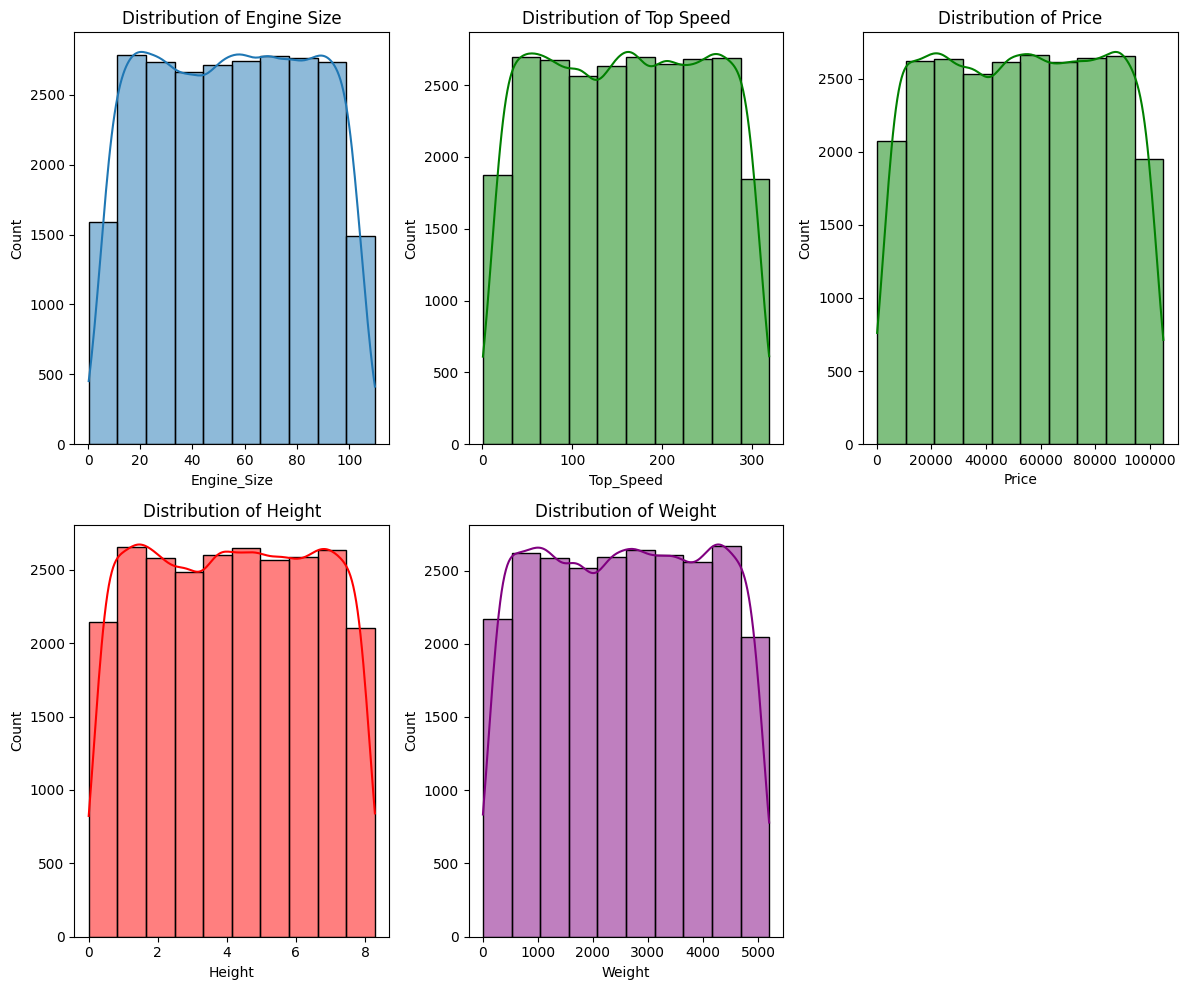

In [22]:
# HISTOGRAMS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the empty 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))


# Plot 1: Top-Left (engine_size)
sns.histplot(data=df, x='Engine_Size', ax=axes[0, 0], kde=True, bins=10)
axes[0, 0].set_title('Distribution of Engine Size')

# Plot 2: Top-Right (top_speed)
sns.histplot(data=df, x='Top_Speed', ax=axes[0, 1], kde=True, color='green', bins=10)
axes[0, 1].set_title('Distribution of Top Speed')

sns.histplot(data=df, x='Price', ax=axes[0, 2], kde=True, color='green', bins=10)
axes[0, 2].set_title('Distribution of Price')

# Plot 3: Bottom-Left (height)
sns.histplot(data=df, x='Height', ax=axes[1, 0], kde=True, color='red',bins=10)
axes[1, 0].set_title('Distribution of Height')

# Plot 4: Bottom-Right (weight)
sns.histplot(data=df, x='Weight', ax=axes[1, 1], kde=True, color='purple', bins=10)
axes[1, 1].set_title('Distribution of Weight')

fig.delaxes(axes[1, 2])
 
plt.tight_layout()
plt.show()

The Shape of the histograms further confirms to us that a significant part of the data was likely randomly generated.

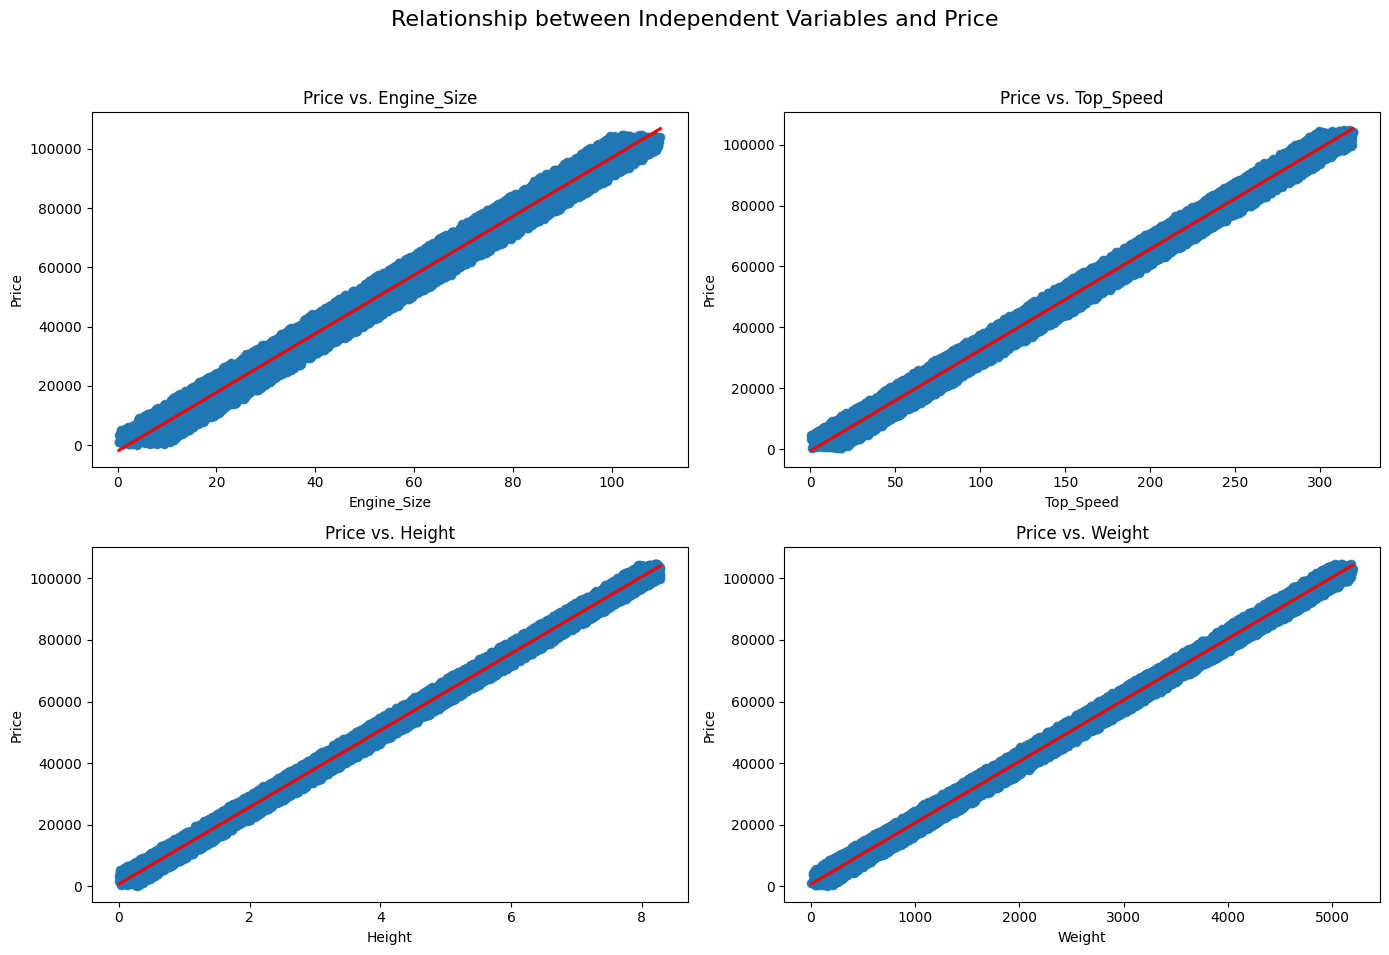

In [23]:
# SCATTERPLOTS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dependent_variable = 'Price'


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Relationship between Independent Variables and Price', fontsize=16)


x_var_1 = 'Engine_Size'  
sns.scatterplot(data=df, x=x_var_1, y=dependent_variable, ax=axes[0, 0])
sns.regplot(data=df, x=x_var_1, y=dependent_variable, ax=axes[0, 0], line_kws={"color":"red"})
axes[0, 0].set_title(f'{dependent_variable} vs. {x_var_1}')


x_var_2 = 'Top_Speed' 
sns.scatterplot(data=df, x=x_var_2, y=dependent_variable, ax=axes[0, 1])
sns.regplot(data=df, x=x_var_2, y=dependent_variable, ax=axes[0, 1], line_kws={"color":"red"})
axes[0, 1].set_title(f'{dependent_variable} vs. {x_var_2}')


x_var_3 = 'Height'  
sns.scatterplot(data=df, x=x_var_3, y=dependent_variable, ax=axes[1, 0])
sns.regplot(data=df, x=x_var_3, y=dependent_variable, ax=axes[1, 0], line_kws={"color":"red"})
axes[1, 0].set_title(f'{dependent_variable} vs. {x_var_3}')


x_var_4 = 'Weight'  
sns.scatterplot(data=df, x=x_var_4, y=dependent_variable, ax=axes[1, 1])
sns.regplot(data=df, x=x_var_4, y=dependent_variable, ax=axes[1, 1], line_kws={"color":"red"})
axes[1, 1].set_title(f'{dependent_variable} vs. {x_var_4}')



plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Almost Perfect Correlation

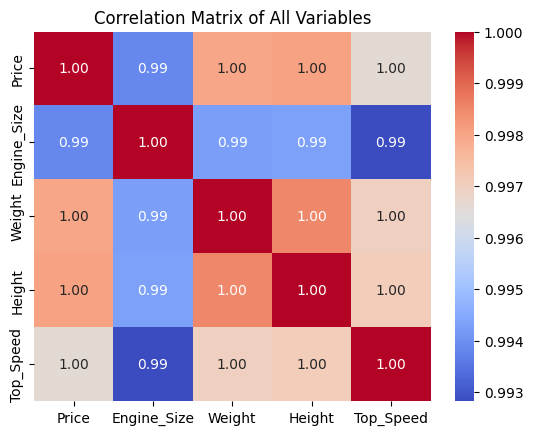

In [24]:
# Correlation Matrix Heatmap

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df[['Price', 'Engine_Size', 'Weight', 'Height', 'Top_Speed']].corr()


sns.heatmap(
    corr_matrix, 
    annot=True,
    cmap='coolwarm', 
    fmt='.2f'
)

plt.title("Correlation Matrix of All Variables")
plt.show()

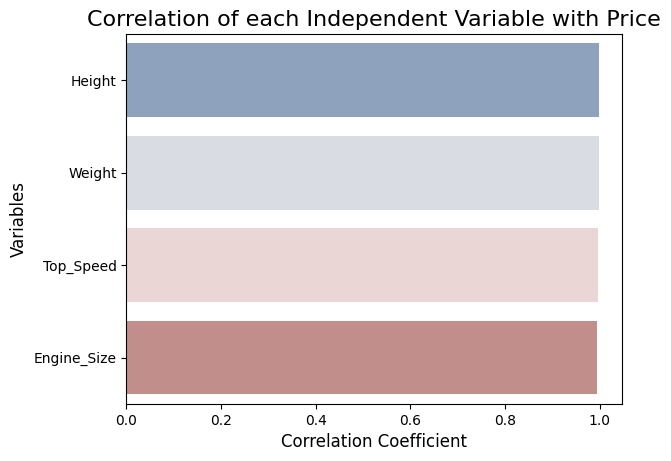

In [25]:
# BAR PLOT CORRELATION
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df[['Price', 'Engine_Size', 'Weight', 'Height', 'Top_Speed']].corr()

price_correlation = corr_matrix['Price'].sort_values(ascending=False)
price_correlation = price_correlation.drop('Price')

sns.barplot(
    x=price_correlation.values,
    y=price_correlation.index,
    palette='vlag'
)

plt.title("Correlation of each Independent Variable with Price", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.grid(False)
plt.show()

                                          
                                        